In [1]:
import torch
import torch.nn as nn
import numpy as np
torch.__version__
torch.manual_seed(0)
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


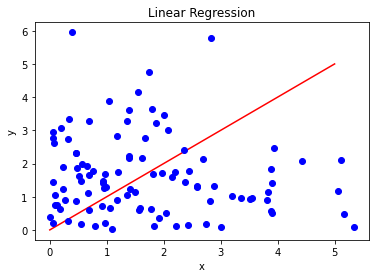

In [11]:
# x = 2.*torch.abs(torch.randn(100)).numpy()
# y = 2.*torch.abs(torch.randn(100)).numpy()
# z = torch.range(0,5)
# plt.title('Linear Regression')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.plot(z,'r')
# plt.plot(x, y, 'bo')
# plt.show()

## Linear Regression

useful links

https://www.youtube.com/watch?v=zPG4NjIkCjc

https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch

Linear regression models a linear relationship between two variables. There is usually an independent value $x$
and a dependent value $y$. Linear regression has an equation with the form $y=ax+b$ and finds the optimal values
$a$ and $b$ that best describe the relationship of the variables. More specifically, this equation describes a straight
line with slope eaual to $a$ and $b$ the intercept (the value of $y$ when $x = 0$).



Let's create and initialize randomly our model's variables  $a$ and $b$.

In [ ]:

a = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
print(a)
print(b)


x = torch.randn(1)
y = a*x+b

y.backward()
print(y,x)

tensor([1.5410], requires_grad=True)
tensor([-0.2934], requires_grad=True)
tensor([-3.6509], grad_fn=<AddBackward0>) tensor([-2.1788])


## Fit simple line

Let's create dummy data and try to fit our linear regression model. We'll initialize randomly our a,b and try to run
some iterations to find the optimal weights that fi oour following line.

$y=2x+0.5$

Now let's create our data and  fit our model.


In [ ]:

a = torch.randn((1,1),requires_grad=True)
b = torch.randn(1,requires_grad=True)

def model(x):
    return x @ a.t() + b





torch.Size([10, 1])
tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])
torch.Size([10, 1])
tensor([[ 2.5000],
        [ 4.5000],
        [ 6.5000],
        [ 8.5000],
        [10.5000],
        [12.5000],
        [14.5000],
        [16.5000],
        [18.5000],
        [20.5000]])
tensor([[-0.5161],
        [ 0.0523],
        [ 0.6208],
        [ 1.1892],
        [ 1.7576],
        [ 2.3261],
        [ 2.8945],
        [ 3.4629],
        [ 4.0314],
        [ 4.5998]], grad_fn=<AddBackward0>)
tensor(106.3641, grad_fn=<MeanBackward0>)
tensor([[0.5684]], requires_grad=True)
tensor([[-127.6605]])
tensor([-1.0845], requires_grad=True)
tensor([-18.9163])
tensor([[0.]])
tensor([0.])


/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].


# MSE LOSS
 Mean Squared Error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors.

$MSE(y,y^{'}) =\sum_{i=1}^{N} (y_{i}-y^{'}_{i})^{2} $


In other words MSE is the mean ${\displaystyle \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$ of the squares of the errors ${\displaystyle (y_{i}-{\hat {y_{i}}})^{2}}$



In [ ]:

def mse(y,y_hat):
     return((y-y_hat)**2).mean()


# Create dataset
Now we'll create our data that decribe the equation $y=2x+0.5$.
We will create only 10 samples but you can do more if you like.

In [ ]:
samples = 10
inputs = torch.range(1,samples).float().unsqueeze(-1)
print(inputs.shape)
print(inputs)
targets = 2. * inputs + 0.5*torch.ones(samples,1)
print(targets.shape)
print(targets)


a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)

Predict $y^{'}$ with the untrained model and see the output and loss

In [ ]:
preds = model(inputs)
print(preds)


# Compute loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()

# Gradients for weights
print(a)
print(a.grad)

# Gradients for bias
print(b)
print(b.grad)


Let's train the model for 100 iterations


In [ ]:

# Train for 100 epochs
lr = 1e-3
for i in range(100):
    preds = model(inputs)
    
    loss = mse(preds, targets)
    
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()

print('Optimization Done')
print(f'a = {a} b = {b}')


# Generate predictions
preds = model(inputs)
print(f'Predictions {preds}')


# Compute loss
loss = mse(preds, targets)
print(f'Loss = {loss.item()}')

Optimization Done
a = tensor([[2.1856]], requires_grad=True) b = tensor([-0.7955], requires_grad=True)
Predictions tensor([[ 1.3901],
        [ 3.5757],
        [ 5.7614],
        [ 7.9470],
        [10.1326],
        [12.3182],
        [14.5039],
        [16.6895],
        [18.8751],
        [21.0607]], grad_fn=<AddBackward0>)
Loss = 0.3596566319465637


## Run linear regression with multidimensional data

In [ ]:
# Weights and biases
a = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)





# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')


# # Input (temp, rainfall, humidity)
# inputs = 0.001*np.array([[73 ], 
#                    [91 ], 
#                    [87], 
#                    [102], 
#                    [69]], dtype='float32')

# # Targets (apples, oranges)
# targets = 0.001*np.array([[56], 
#                     [81], 
#                     [119], 
#                     [22], 
#                     [103]], dtype='float32')

# Convert inputs and targets to tensors

print(inputs.shape)
print(targets.shape)
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)





# Define the model
def model(x):
    return x @ a.t() + b

# MSE loss

def mse(y,y_hat):
     return((y-y_hat)**2).mean()



# Generate predictions
preds = model(inputs)
print(preds)


# Compute loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()



# Gradients for weights
print(a)
print(a.grad)



# Gradients for bias
print(b)
print(b.grad)



a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)


(5, 3)
(5, 2)
tensor([[ -38.8561, -106.0418],
        [ -37.9619, -139.9880],
        [ -18.8418, -152.0850],
        [ -94.1238, -113.6402],
        [   1.0621, -130.9709]], grad_fn=<AddBackward0>)
tensor(32154.3379, grad_fn=<MeanBackward0>)
tensor([[-1.3986,  0.4033,  0.8380],
        [-0.7193, -0.4033, -0.5966]], requires_grad=True)
tensor([[ -9724.1221, -10014.8340,  -6223.8867],
        [-18439.3301, -20335.5742, -12519.9219]])
tensor([ 0.1820, -0.8567], requires_grad=True)
tensor([-113.9443, -220.5452])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


Iterate again

In [ ]:
# Train for 100 epochs
lr = 1e-5
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()
print(f'Loss {loss.item():.2f}')

Loss 32154.34
Loss 9129929.00
Loss 2610502400.00
Loss 746420764672.00
Loss 213424055255040.00
Loss 61024338450579456.00
Loss 17448686582851698688.00
Loss 4989102303899824422912.00
Loss 1426534277232024658903040.00
Loss 407888870934643492467507200.00
Loss 116627652230322923310191476736.00
Loss 33347338636072866334230678863872.00
Loss 9535003514718354129369510547816448.00
Loss 2726342801076504172003317441493991424.00
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss inf
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss 

In [ ]:
# Train for 100 epochs
lr = 1e-3
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    print(f'Loss {loss.item():.2f}')
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()

Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan
Loss nan


## Define Linear Regression model using PyTorch built-in Functions

We will reimplement the same model using PyTorch built-in libraries. To create a linear model we will use `Linear()` class from `torch.nn` package.
To calculate MSE loss we will import `nn.MSELoss()` and `torch.optim.SGD` to create a Stochastic Gradient Descent optimizer and train our model.





In [ ]:

inputs = torch.range(1,10).float().unsqueeze(-1)
#print(inputs.shape)
#print(inputs)
targets = 2. * torch.range(1,10).float().unsqueeze(-1) + 0.5*torch.ones(10,1)
#print(targets.shape)

lr_model = nn.Linear(in_features=1,out_features=1)
optimizer = torch.optim.SGD(lr_model.parameters(),lr=0.001)
criterion = nn.MSELoss(size_average=True)



/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.
/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.
/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0.026713624596595764
tensor([[2.0499]])
tensor([0.1472])


As you can see, using built-in functions  is much easier and requires significantly less code.
Now let's train the model.
The main steps of 1 training iteration are: 
1. Generate predictions with the linear model
1. Calculate loss and backpropagate `loss.backward()`
1. Update weights and biases of linear model `optimizer.step()`
1. Finally, call `optimizer.zero_grad()` to zero the gradient buffers of the model.
 

In [ ]:
for i in range(100):
    preds = lr_model(inputs)
    loss = criterion(preds,targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()



Now that we trained our model, let's print the final loss and updated weights

In [ ]:
print(loss.item())
print(lr_model.weight.data)
print(lr_model.bias.data)

# Wine Quality dataset

We will tackle to solve a real problem now instead of random data. We will use the linear regression model to predict the wine quality based on different metrichs (pH,acidity etc.)

You can download the dataset from the following link
![Dataset link]https://archive.ics.uci.edu/ml/datasets/Wine+Quality

- Read Data
- Create Dataloader
- Model
- Train

Let's read our dataset now and explore what type of data it contains.

In [ ]:
import csv

def read_wine_data():
    with open('./data/winequality-red.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        print(csv_reader)
        line_count = 0
        wine_data = []
        categories = []
        for idx,row in enumerate(csv_reader):
            #print(row)
            if idx ==0 :
                categories = row
            else:


                r = list(map(float, row))
                wine_data.append(r)
        data_tensor = torch.tensor(wine_data)
    return data_tensor,categories


data_tensor,categories = read_wine_data()
#results = list(map(int, results))
print(data_tensor.shape)
print(categories)
inputs = data_tensor[:,:-1]
targets = data_tensor[:,-1].unsqueeze(-1)
print(targets)
print(inputs.shape)
print(targets.shape)



torch.Size([1599, 12])
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
tensor([[5.],
        [5.],
        [5.],
        ...,
        [6.],
        [5.],
        [6.]])
torch.Size([1599, 11])
torch.Size([1599, 1])
12.68463984131813
6.692981839179993
5.26429982483387
4.2506261467933655
3.4865940511226654
2.9260557740926743
2.506434954702854
2.1743488386273384
1.9196989461779594
1.7100230306386948


Create dataloaders using TensorDataset and Dataloader from PyTorch. 
With TensorDataset you can create an iterable dataset by initializing it with the loaded tensors-data. 


In [ ]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
print(train_ds[0:3])
# Define data loader
batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))




# Create Linear regression  model 



In [ ]:

lr_model = nn.Linear(in_features=11,out_features=1)
optimizer = torch.optim.SGD(lr_model.parameters(),lr=0.0001)
criterion = nn.MSELoss(size_average=True)
from torch.utils.data import TensorDataset, DataLoader


# Training

In [ ]:

epochs = 10
for i in range(epochs):
    average_loss = 0.0
    for batch_index, (x,y) in enumerate(train_dl):
        preds = lr_model(x)
        loss = criterion(preds,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        average_loss +=loss.item()
    print(f'Average loss = {average_loss/len(train_dl)}')


#print(lr_model.weight.data)
#print(lr_model.bias.data)